<a href="https://colab.research.google.com/github/NguyenGiaKhanh141/Predict-number-using-linear-regression/blob/main/Predict_number_of_student_admitted_to_American_College.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 10> Linear Regression </font></h1>

In this notebook, we try to practice the linear regression algorithm that we learned in this course.

We load a dataset using Pandas library and apply the following algorithm, and find the best one for this specific dataset by accuracy evaluation methods.
Lets first load required libraries:

In [ ]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

matplotlib.style.use('ggplot') # Look Pretty

### A Convenience Function

This convenience method will take care of plotting your test observations, comparing them to the regression line, and displaying the R2 coefficient

In [ ]:
def drawLine(model, X_test, y_test, title, R2):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, model.predict(X_test), color='orange', linewidth=1, alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

In [ ]:
def drawPlane(model, X_test, y_test, title, R2):
    # This convenience method will take care of plotting your
    # test observations, comparing them to the regression plane,
    # and displaying the R2 coefficient
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')

    
    # You might have passed in a DataFrame, a Series (slice),
    # an NDArray, or a Python List... so let's keep it simple:
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]

    
    # Set up a Grid. We could have predicted on the actual
    # col1, col2 values directly; but that would have generated
    # a mesh with WAY too fine a grid, which would have detracted
    # from the visualization
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)

    
    # Predict based on possible input values that span the domain
    # of the x and y inputs:
    z = model.predict(  np.c_[x.ravel(), y.ravel()]  )
    z = z.reshape(x.shape)

    
    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    title += " R2: " + str(R2)
    ax.set_title(title)
    print(title)
    print("Intercept(s): ", model.intercept_)

    plt.show()

# Mandatory part (85%  of the total score)

## About dataset

This project relates to the College data set, which can be found in the file College.csv in the data folder. It contains a number of variables for 777 different universities and colleges in the US. The variables are:

**Private** : Public/private indicator

**Apps** : Number of applications received

**Accept** : Number of applicants accepted

**Enroll** : Number of new students enrolled

**Top10perc** : New students from the top 10% of high school class

**Top25perc** : New students from the top 25% of high school class

**F.Undergrad** : Number of full-time undergraduates

**P.Undergrad** : Number of part-time undergraduates

**Outstate** : Out-of-state tuition

**Room.Board** : Room and board costs

**Books** : Estimated book costs

**Personal** : Estimated personal spending

**PhD** : Percent of faculty with Ph.D.’s

**Terminal** : Percent of faculty with a terminal degree

**S.F.Ratio** : Student/faculty ratio

**perc.alumni** : Percent of alumni who donate

**Expend** : Instructional expenditure per student

**Grad.Rate** : Graduation rate

## The problem:

The type of dataset and problem is a classic regression. Given a number of elements all with certain characteristics (features), we want to build a machine learning model to identify the **number of people accepted**.

To solve the problem we will have to analyze the data, do any required transformation and normalization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate until we find the most performant for our type of dataset.

First, as is your habit, inspect your dataset in a text editor, or spread sheet application. The first thing you should notice is that the first column is both unique (the name of each) college, as well as unlabeled. This is a HINT that it must be the index column. If you do not indicate to Pandas that you already have an index column, it'll create one for you, which would be undesirable since you already have one. 

**1. Review the `.read_csv()` documentation and discern how to load up a dataframe while indicating which existing column is to be taken as an index. Then, load up the College dataset into a variable called `X`:**

In [ ]:
import pymysql

conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='',db='college')

x=pd.read_sql_query("SELECT * FROM college ",conn)
x.head()

C:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,COL 1,COL 2,COL 3,COL 4,COL 5,COL 6,COL 7,COL 8,COL 9,COL 10,COL 11,COL 12,COL 13,COL 14,COL 15,COL 16,COL 17,COL 18,COL 19
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
#check null data
x.isnull().sum()

COL 1     0
COL 2     0
COL 3     0
COL 4     0
COL 5     0
COL 6     0
COL 7     0
COL 8     0
COL 9     0
COL 10    0
COL 11    0
COL 12    0
COL 13    0
COL 14    0
COL 15    0
COL 16    0
COL 17    0
COL 18    0
COL 19    0
dtype: int64

In [ ]:
#set columns name
x.columns = ['SchoolName','Private', 'Apps', 'Accept', 'Enroll','Top10perc','Top25perc','F.Undergrad','P.Undergrad','Outstate','Room.Board','Books','Personal','PhD','Terminal','S.F.Ratio','perc.alumni','Expend','Grad.Rate']
x.head()

,SchoolName,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
#set index
x.set_index('SchoolName', inplace=True)

x.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
SchoolName,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
#check data type
print(x.dtypes)

Private        object
Apps            int64
Accept          int64
Enroll          int64
Top10perc       int64
Top25perc       int64
F.Undergrad     int64
P.Undergrad     int64
Outstate        int64
Room.Board      int64
Books           int64
Personal        int64
PhD             int64
Terminal        int64
S.F.Ratio      object
perc.alumni     int64
Expend          int64
Grad.Rate       int64
dtype: object


In [ ]:
x['S.F.Ratio'] = x['S.F.Ratio'].astype('float')
x.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
SchoolName,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [ ]:
#TO DO:


This line isn't necessary for your purposes, but we'd just like to show you an additional way to encode features directly. The `.map()` method is like `.apply()`, but instead of taking in a lambda/function, you simply provide a mapping of keys:values. If you decide to embark on the "Data Scientist Challenge", this line of code will save you the trouble of converting it through other means.

**2. Transform the Private column to {'Yes':1, 'No':0} using map function.**

In [ ]:
#TO DO:

In [ ]:
x['Private'].map({'Yes': '1', 'No': '0'})
x.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
SchoolName,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**3. Create your linear regression model here and store it in a variable called `model`.**

Don't actually train or do anything else with it yet:

In [ ]:
#TO DO:

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()

The first relationship we're interested in is the number of accepted students, as a function of the amount charged for room and board.

**4. Using indexing, create two slices (series). One will just store the room and board column (X_rb), the other will store the accepted students' column (y_acc).**

In [ ]:
#TO DO:

In [ ]:
fdf = x[['Room.Board','Accept']]
fdf.head(9)

,Room.Board,Accept
SchoolName,,
Abilene Christian University,3300,1232
Adelphi University,6450,1924
Adrian College,3750,1097
Agnes Scott College,5450,349
Alaska Pacific University,4120,146
Albertson College,3335,479
Albertus Magnus College,5720,340
Albion College,4826,1720
Albright College,4400,839


In [ ]:
fdf.columns = ['X_rb','y_acc']
fdf.head()

,X_rb,y_acc
SchoolName,,
Abilene Christian University,3300,1232
Adelphi University,6450,1924
Adrian College,3750,1097
Agnes Scott College,5450,349
Alaska Pacific University,4120,146


**5. Then use train_test_split to cut your data up into `X_train`, `X_test`, `y_train`, `y_test`, with a `test_size` of 30% and a random_state of 7**

**Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.**


In [ ]:
#TO DO:
msk = np.random.rand(len(x)) < 0.7
train = fdf[msk]
test = fdf[~msk]
test

,X_rb,y_acc
SchoolName,,
Alaska Pacific University,4120,146
Albertus Magnus College,5720,340
Alderson-Broaddus College,3380,498
Andrews University,3090,704
Antioch University,3336,661
...,...,...
Wilson College,5084,130
Wingate College,3400,1017
Wisconsin Lutheran College,3700,128


**6. Fit and score your model appropriately. Store the score in the `score` variable and print it.**

In [ ]:
#TO DO:

In [ ]:
train_x = np.asanyarray(train[['X_rb']])
train_y = np.asanyarray(train[['y_acc']])
model.fit (train_x, train_y)
score = model.score(train_x, train_y)
score

0.012905033759617268

**7. Draw the model, X_test, y_test, score(R2 score) using the drawLine function.**

In [ ]:
#TO DO:

room.board R2: 0.012905033759617268
Intercept(s):  [967.93767975]


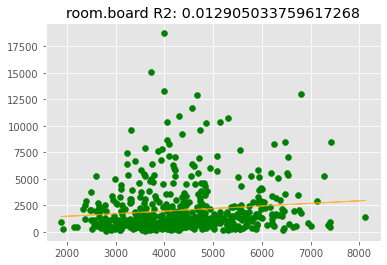

In [ ]:
drawLine(model, train_x, train_y, 'room.board', score)


**8. Duplicate the process above (5,6, 7); this time, model the number of accepted students, as a function of the number of enrolled students per college.**

Don't forget to split data with random_state = 7.

In [ ]:
#TO DO:

enrolled students R2: 0.8670092139093956
Intercept(s):  [173.7173666]


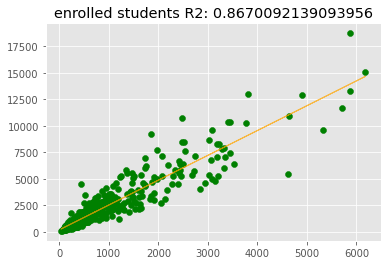

In [ ]:
#create two slices (series)
sdf = x[['Enroll','Accept']]
sdf.columns = ['X_er','y_acc']
#test_size of 30% and a random_state of 7
train2 = sdf[msk]
test2 = sdf[~msk]
#Fit and score model appropriately
train2_x = np.asanyarray(train2[['X_er']])
train2_y = np.asanyarray(train2[['y_acc']])
model.fit (train2_x, train2_y)
score2 = model.score(train2_x, train2_y)
# Draw the model
drawLine(model, train2_x, train2_y, 'enrolled students', score2)


**9. Duplicate the process above (5, 6, 7); this time, model the number of accepted students, as function of the number of full-time undergraduates students per college.**

Don't forget to split data with random_state = 7.

In [ ]:
#TO DO:

full-time undergraduates R2: 0.7974096280626295
Intercept(s):  [419.40557898]


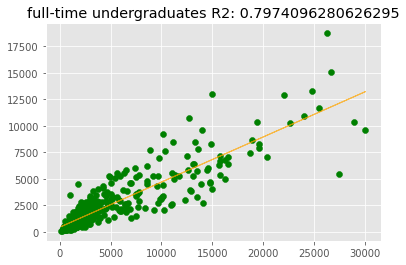

In [ ]:
#create two slices (series)
tdf = x[['F.Undergrad','Accept']]
tdf.columns = ['X_fu','y_acc']
#test_size of 30% and a random_state of 7
train3 = tdf[msk]
test3 = tdf[~msk]
#Fit and score model appropriately
train3_x = np.asanyarray(train3[['X_fu']])
train3_y = np.asanyarray(train3[['y_acc']])
model.fit (train3_x, train3_y)
score3 = model.score(train3_x, train3_y)
# Draw the model
drawLine(model, train3_x, train3_y, 'full-time undergraduates', score3)


**10. Duplicate the process above (5, 6). This time is going to be a bit more complicated. Instead of modeling one feature as a function of another, you will attempt to do multivariate linear regression to model one feature as a function of TWO other features. Let's print out the model score.**

Model the number of accepted students as a function of the amount charged for room and board _and_ the number of enrolled students. To do this, instead of creating a regular slice for a single-feature input, simply create a slice that contains both columns you wish to use as inputs. Your training labels will remain a single slice.
    
Don't forget to split data with random_state = 7.

In [ ]:
#TO DO:

In [ ]:
#create two slices (series)
fdf = x[['Room.Board','Enroll','Accept']]
fdf.columns = ['X_rb','X_er','y_acc']
#test_size of 30% and a random_state of 7
train4 = fdf[msk]
test4 = fdf[~msk]
#Fit and score model appropriately
train4_x = np.asanyarray(train4[['X_rb','X_er']])
train4_y = np.asanyarray(train4[['y_acc']])
model.fit (train4_x, train4_y)
score4 = model.score(train4_x, train4_y)
score4


0.8848209650689736

# Advanced part (15%  of the total score)

**11. Duplicate the process above (5,6), try to use your own features set and your own model with modified parameters.**

    Requirement: Score > 0.875
    
    Don't forget to split data with random_state = 7.

In [ ]:
#TO DO:

Graduate rate R2: 0.8764678931733987
Intercept(s):  [196.8831108]


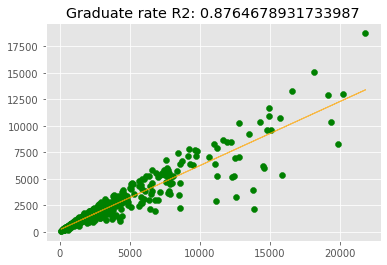

In [ ]:
#create two slices (series)
sdf = x[['Apps','Accept']]
sdf.columns = ['X_app','y_acc']
#test_size of 30% and a random_state of 7
train5 = sdf[msk]
test5 = sdf[~msk]
#Fit and score model appropriately
train5_x = np.asanyarray(train5[['X_gr']])
train5_y = np.asanyarray(train5[['y_t']])
model.fit (train5_x, train5_y)
score5 = model.score(train5_x, train5_y)
# Draw the model
drawLine(model, train5_x, train5_y, 'Apps', score5)